In [540]:
# Import packages

# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Bronx

In [ ]:
# Loading data
bronx = pd.read_csv('clean_data/bronx.csv')
bronx.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466,23,0,8,22,741.608696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,Co-op City,40.874294,-73.829939,10475,25,0,18,25,749.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,10466,25,0,24,25,554.440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,10471,25,0,16,24,875.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,10463,25,0,23,25,633.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To Drop
- Latitude
- Longitude
- Restaurant_Count_Price

We really only need a count of schools, as not a lot of people rate and review schools. Also don't want price to be involved, as it could be an economic indicator

- School_Mean_Reviews
- School_Mean_Rating 
- School_Sum_Reviews 
- School_Sum_Rating 
- School_Sum_Price 

- Park_Sum_Rating

Again, these aren't really things tend people tend to rate & review, but it might be interesting to see how many people review total

- Transit_Mean_Reviews
- Transit_Mean_Rating
- Transit_Sum_Rating
- Grocery_Sum_Rating

These variables don't actually tell us anything
- Uber_Count_Ride Count
- Uber_Mean_Month
- Uber_Mean_Day 


In [ ]:
# bronx.drop(columns=['Restaurant_Count_Price','School_Mean_Reviews',
#                     'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
#                    'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
#                    'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
#                    'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
#                    'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
#                    'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
#                    'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
#                    'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [ ]:
bronx.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [ ]:
bronx.fillna(0, inplace=True)

In [ ]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 52 non-null     object 
 1   Restaurant_Count_Name         52 non-null     int64  
 2   Restaurant_Mean_Distance (m)  52 non-null     float64
 3   Restaurant_Mean_Rating        52 non-null     float64
 4   Restaurant_Mean_Price         52 non-null     float64
 5   Restaurant_Sum_Reviews        52 non-null     int64  
 6   Restaurant_Sum_Rating         52 non-null     float64
 7   Restaurant_Sum_Price          52 non-null     int64  
 8   School_Count_Name             52 non-null     float64
 9   Park_Count_Name               52 non-null     float64
 10  Park_Mean_Rating              52 non-null     float64
 11  Transit_Count_Name            52 non-null     float64
 12  Grocery_Count_Name            52 non-null     float64
 13  Rat_Mea

In [ ]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [ ]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(bronx['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
bronx['NeighbourhoodLabel'] = Neighbourhood_labels

In [ ]:
bronx.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [ ]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [ ]:
df_norm = pd.DataFrame(n_scaler.fit_transform(bronx),columns=bronx.columns)

In [ ]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(bronx), columns=bronx.columns)

In [ ]:
df_robust = pd.DataFrame(r_scaler.fit_transform(bronx), columns=bronx.columns)

## Elbow Rule

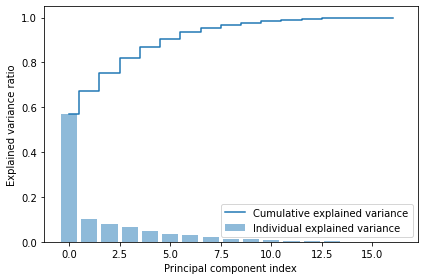

In [ ]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [ ]:
df_pca = apply_pca(df_scaled, 5)

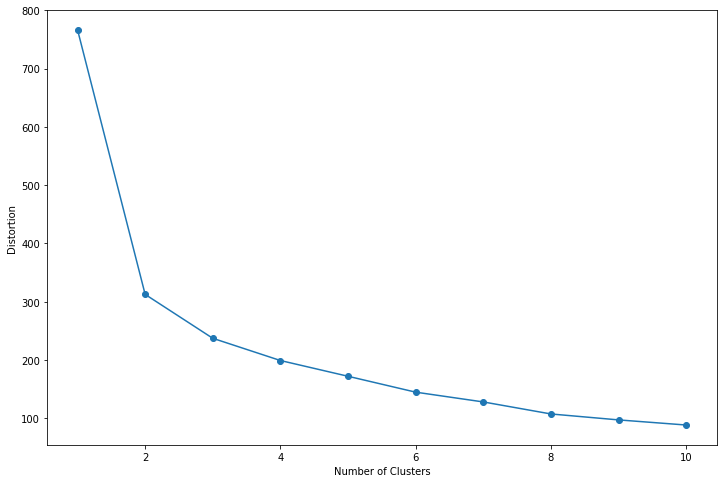

In [ ]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

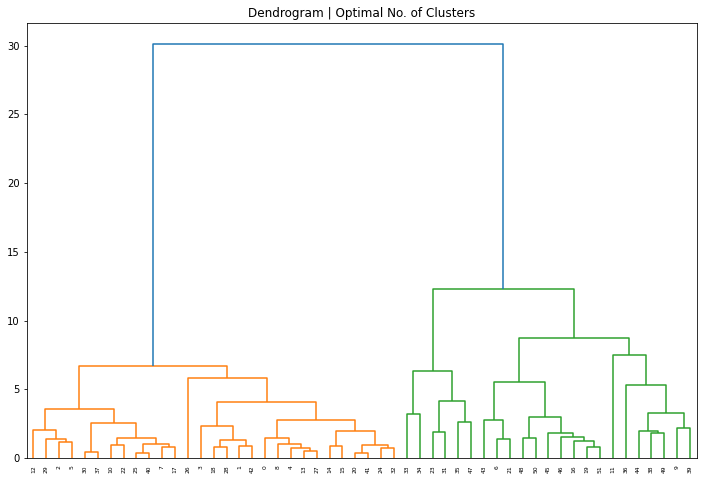

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [ ]:
# 2 & 3 clusters

In [ ]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [ ]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

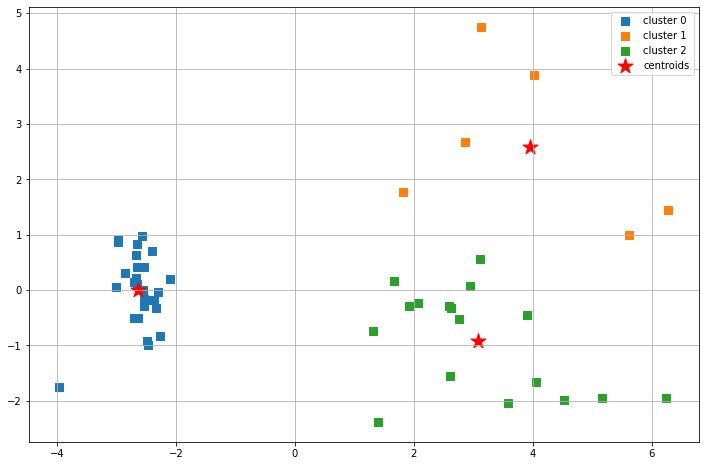

In [ ]:
plot_clusters(np.array(df_pca), y_km)

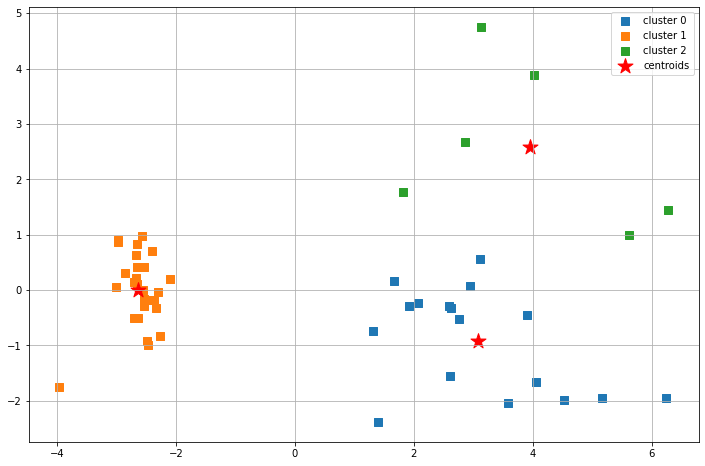

In [ ]:
plot_clusters(np.array(X), y_ac)

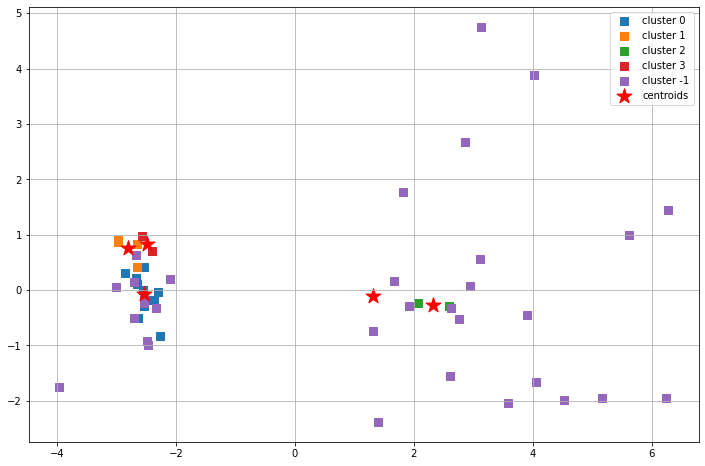

In [ ]:
plot_clusters(np.array(X), y_db)

In [ ]:
bronx['cluster'] = y_km

In [ ]:
bronx_c0 = bronx[bronx['cluster']==0].drop('cluster', axis=1)
bronx_c1 = bronx[bronx['cluster']==1].drop('cluster', axis=1)

In [ ]:
df_scaled['cluster'] = y_km

In [ ]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [ ]:
bronx_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.000000
mean,23.862069,638.317431,3.054618,1.415795,0.0,39.797160,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.724138
std,3.430162,97.140607,0.681376,0.133146,0.0,22.617713,7.343608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.943500
min,7.000000,455.160000,0.000000,1.181818,0.0,0.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
25%,24.000000,554.440000,2.887955,1.318182,0.0,23.450980,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000
50%,25.000000,641.521739,3.196078,1.409091,0.0,37.313725,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.000000
75%,25.000000,693.240000,3.362745,1.500000,0.0,52.686275,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.000000
max,25.000000,875.120000,3.843137,1.666667,0.0,95.980392,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000


In [ ]:
bronx_clustered = bronx

In [ ]:
bronx_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,23,741.608696,3.294118,1.454545,0,26.352941,32,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,47,0
1,25,749.600000,2.882353,1.480000,0,51.882353,37,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,9,0
2,25,554.440000,3.035948,1.480000,0,72.862745,37,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,14,0
3,25,875.120000,3.274510,1.500000,0,52.392157,36,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,17,0
4,25,633.560000,3.431373,1.560000,0,78.921569,39,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,39,0
5,25,532.280000,3.839216,1.400000,0,95.980392,35,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,21,0
6,80,595.822057,3.638829,1.278689,12558,240.162745,78,38.0,5.0,4.020000,32.0,12.0,0.045161,11.574324,0.0,0.0,51,2
7,25,552.360000,2.887955,1.320000,0,40.431373,33,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,32,0
8,25,672.160000,3.843137,1.500000,0,15.372549,30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,50,0
9,58,633.759419,3.361765,1.568627,27375,188.258824,80,25.0,7.0,4.500000,20.0,4.0,0.187500,13.846154,0.0,0.0,1,2


In [ ]:
bronx.groupby(['cluster']).mean()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,23.862069,638.317431,3.054618,1.415795,0.000000,39.797160,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,28.724138
1,67.333333,612.455792,3.794599,1.472753,12833.666667,214.750980,82.500000,22.5,21.500000,4.188818,29.833333,10.500000,0.073506,9.973285,3.166667,1.0,28.500000
2,67.294118,614.776620,3.678554,1.474057,15859.235294,207.114418,79.764706,26.0,15.411765,4.185309,28.470588,10.882353,0.070656,10.012182,0.000000,0.0,18.941176


# Staten Island

In [541]:
# Loading data
si = pd.read_csv('clean_data/Staten_Island.csv')
si.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Staten Island,St. George,40.644982,-74.079353,10301.0,25,0,14,24,424.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Staten Island,New Brighton,40.640615,-74.087017,10301.0,25,0,9,21,773.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Staten Island,Stapleton,40.626928,-74.077902,10301.0,25,0,9,23,402.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Staten Island,Rosebank,40.615305,-74.069805,10305.0,25,0,12,24,371.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,West Brighton,40.631879,-74.107182,10301.0,25,0,17,21,327.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
si.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [544]:
si.fillna(0, inplace=True)

In [545]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 63 non-null     object 
 1   Restaurant_Count_Name         63 non-null     int64  
 2   Restaurant_Mean_Distance (m)  63 non-null     float64
 3   Restaurant_Mean_Rating        63 non-null     float64
 4   Restaurant_Mean_Price         63 non-null     float64
 5   Restaurant_Sum_Reviews        63 non-null     int64  
 6   Restaurant_Sum_Rating         63 non-null     float64
 7   Restaurant_Sum_Price          63 non-null     int64  
 8   School_Count_Name             63 non-null     float64
 9   Park_Count_Name               63 non-null     float64
 10  Park_Mean_Rating              63 non-null     float64
 11  Transit_Count_Name            63 non-null     float64
 12  Grocery_Count_Name            63 non-null     float64
 13  Rat_Mea

In [546]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [547]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(si['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
si['NeighbourhoodLabel'] = Neighbourhood_labels

In [548]:
si.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [549]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [550]:
df_norm = pd.DataFrame(n_scaler.fit_transform(si),columns=si.columns)

In [551]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(si), columns=si.columns)

In [552]:
df_robust = pd.DataFrame(r_scaler.fit_transform(si), columns=si.columns)

## Elbow Rule

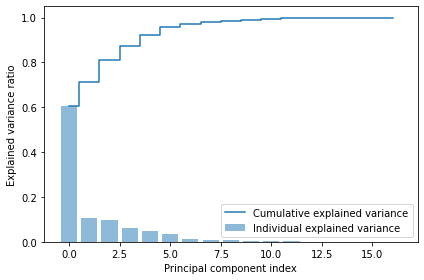

In [553]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [554]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [555]:
df_pca = apply_pca(df_scaled, 5)

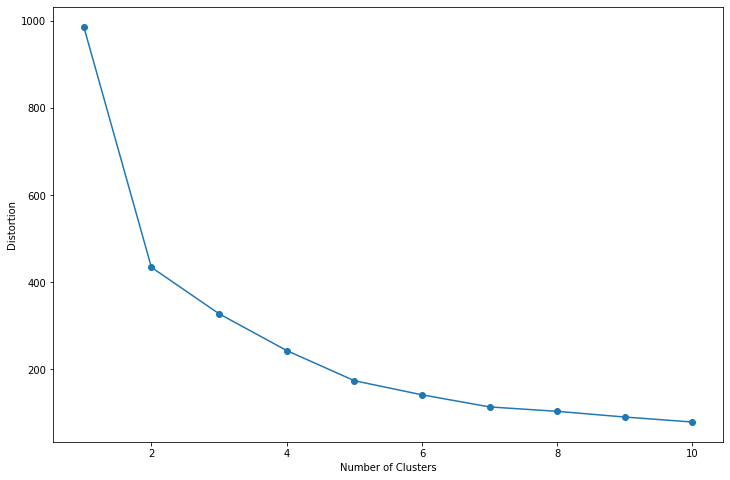

In [556]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

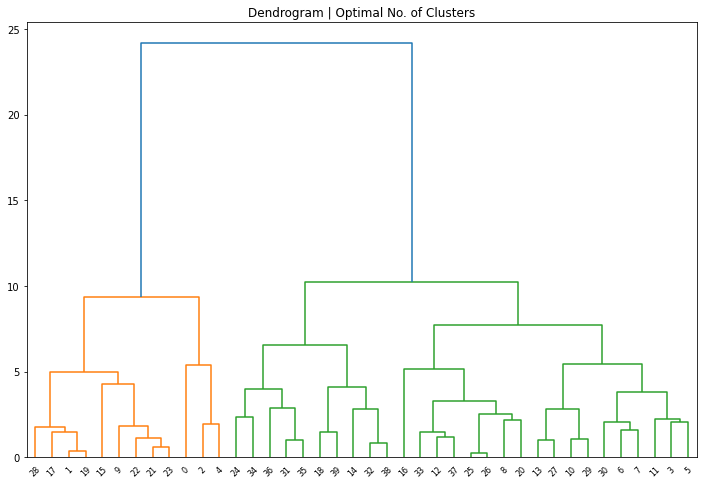

In [557]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [558]:
# 2 & 3 clusters

In [559]:
X = df_pca

# K-Means
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [560]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

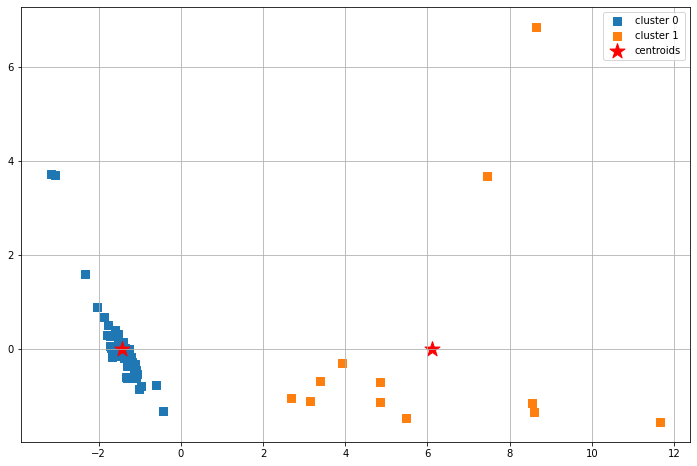

In [561]:
plot_clusters(np.array(df_pca), y_km)

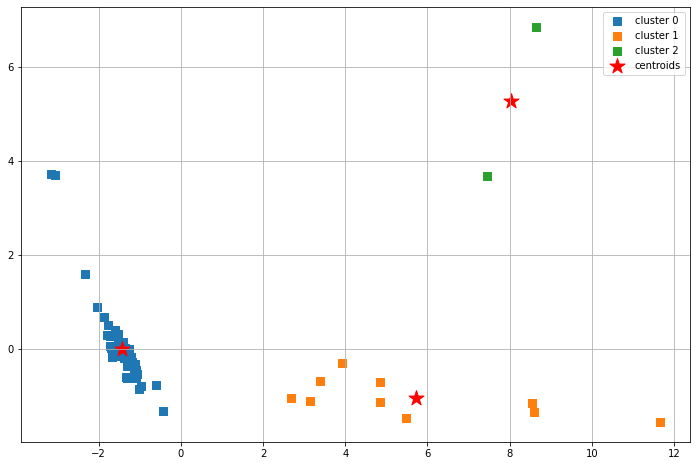

In [562]:
plot_clusters(np.array(X), y_ac)

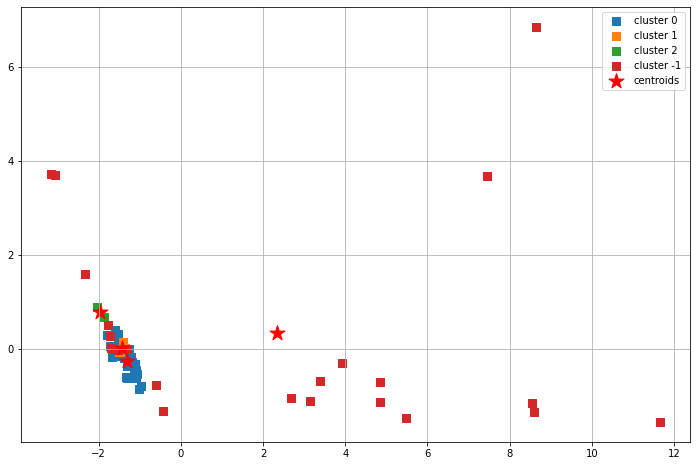

In [563]:
plot_clusters(np.array(X), y_db)

In [564]:
si['cluster'] = y_km

In [565]:
si_c0 = si[si['cluster']==0].drop('cluster', axis=1)
si_c1 = si[si['cluster']==1].drop('cluster', axis=1)

In [566]:
df_scaled['cluster'] = y_km

In [567]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [568]:
si_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.000000
mean,19.215686,563.519493,2.935586,1.401847,0.0,31.930411,24.274510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.941176
std,9.200682,210.632827,0.822007,0.346467,0.0,27.326955,15.428647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.040412
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,11.500000,467.000000,2.828431,1.325758,0.0,11.529412,10.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000
50%,24.000000,574.500000,3.175163,1.485714,0.0,23.901961,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
75%,25.000000,705.796429,3.358409,1.583333,0.0,47.176471,37.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.500000
max,41.000000,958.333333,4.134641,1.920000,0.0,124.039216,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.000000


In [569]:
si_clustered = si

In [570]:
si_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,25,424.520000,3.386555,1.708333,0,47.411765,41,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,52,0
1,25,773.080000,3.605664,1.428571,0,32.450980,30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,32,0
2,25,402.400000,3.239651,1.434783,0,29.156863,33,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,53,0
3,25,371.320000,3.405229,1.583333,0,40.862745,38,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,46,0
4,25,327.600000,3.389850,1.380952,0,57.627451,29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,634.777778,2.764706,1.250000,0,5.529412,5,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,14,0
59,91,347.037984,3.585043,1.585714,13935,308.313725,111,39.0,17.0,4.213333,70.0,2.0,0.000000,0.000000,0.0,0.0,42,1
60,132,762.631844,3.757765,1.706522,26044,473.478431,157,54.0,21.0,4.315000,125.0,4.0,0.103226,20.135714,0.0,0.0,28,1
61,101,637.127779,3.746132,1.683544,17087,340.898039,133,25.0,25.0,4.542857,80.0,3.0,0.000000,0.000000,0.0,0.0,45,1


In [571]:
si.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,25,424.520000,3.386555,1.708333,0,47.411765,41,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,52
1,67,610.010441,3.859477,1.580645,10143,208.411765,98,21.0,3.0,4.2,19.0,2.0,0.042017,15.368421,0.0,0.0,41


# Queens

In [572]:
# Loading data
queens = pd.read_csv('clean_data/queens.csv')
queens.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Queens,Astoria,40.768509,-73.915654,11105,25,0,25,23,614.680000,...,13.000000,2011.000000,4.000000,13.000000,31.000000,NaN,NaN,NaN,NaN,NaN
1,Queens,Woodside,40.746349,-73.901842,11372,25,0,25,23,470.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Queens,Jackson Heights,40.751981,-73.882821,11372,67,47,67,66,616.132372,...,15.036036,2016.821782,6.603960,16.237624,7.831683,1.0,1.0,9.0,21.0,1.0
3,Queens,Elmhurst,40.744049,-73.881656,11373,25,0,25,25,556.520000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queens,Howard Beach,40.654225,-73.838138,11414,54,45,54,53,474.089308,...,16.951220,2016.000000,6.923077,17.102564,23.641026,NaN,NaN,NaN,NaN,NaN


In [573]:
queens.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [574]:
queens.fillna(0, inplace=True)

In [575]:
queens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 81 non-null     object 
 1   Restaurant_Count_Name         81 non-null     int64  
 2   Restaurant_Mean_Distance (m)  81 non-null     float64
 3   Restaurant_Mean_Rating        81 non-null     float64
 4   Restaurant_Mean_Price         81 non-null     float64
 5   Restaurant_Sum_Reviews        81 non-null     int64  
 6   Restaurant_Sum_Rating         81 non-null     float64
 7   Restaurant_Sum_Price          81 non-null     int64  
 8   School_Count_Name             81 non-null     float64
 9   Park_Count_Name               81 non-null     float64
 10  Park_Mean_Rating              81 non-null     float64
 11  Transit_Count_Name            81 non-null     float64
 12  Grocery_Count_Name            81 non-null     float64
 13  Rat_Mea

In [576]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [577]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(queens['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
queens['NeighbourhoodLabel'] = Neighbourhood_labels

In [578]:
queens.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [579]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [580]:
df_norm = pd.DataFrame(n_scaler.fit_transform(queens),columns=queens.columns)

In [581]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(queens), columns=queens.columns)

In [582]:
df_robust = pd.DataFrame(r_scaler.fit_transform(queens), columns=queens.columns)

## Elbow Rule

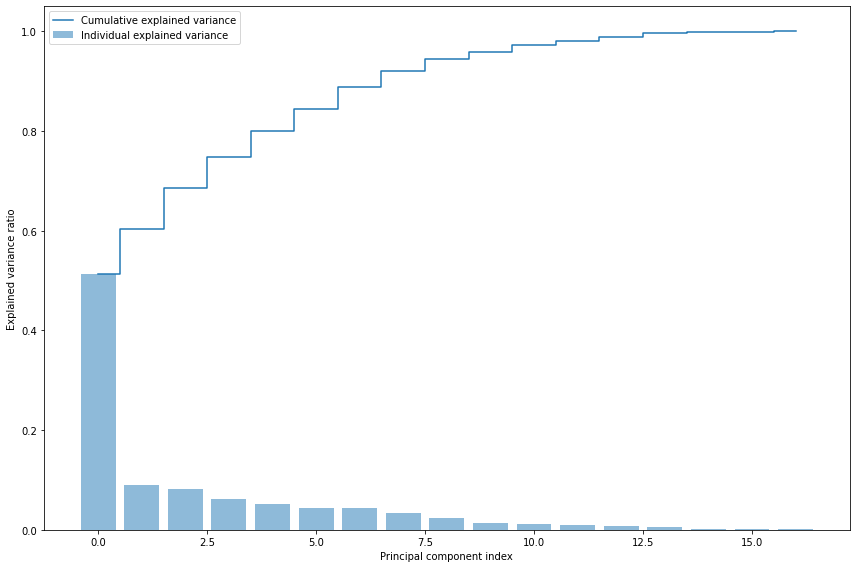

In [583]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [584]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [585]:
df_pca = apply_pca(df_scaled, 5)

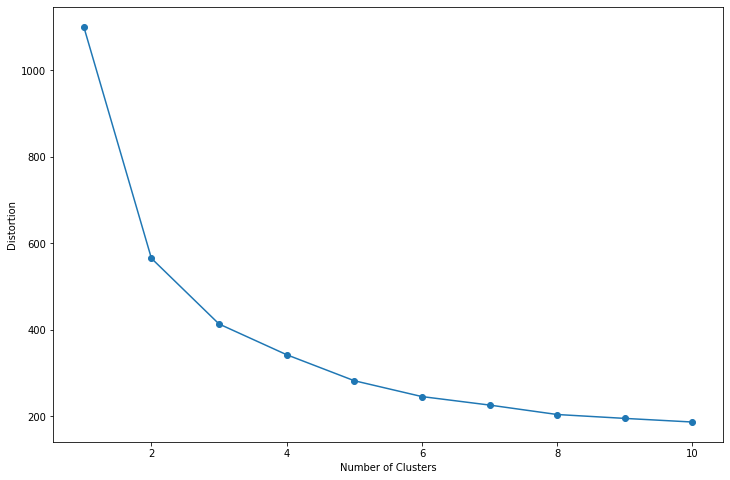

In [586]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

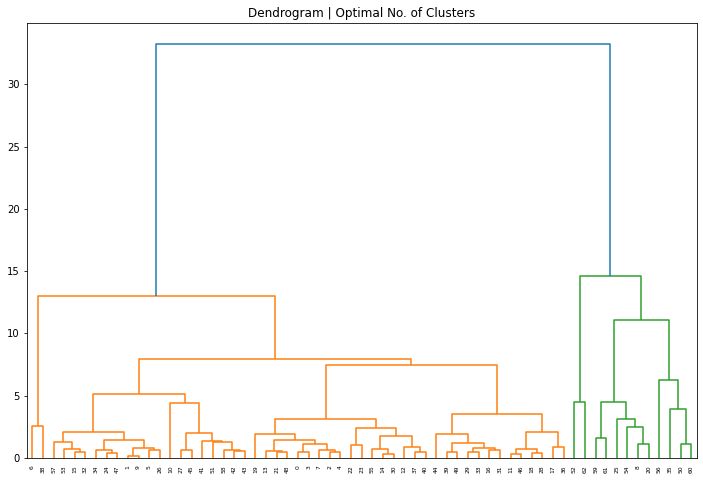

In [587]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [588]:
# 3 and 3 clusters

In [589]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [590]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

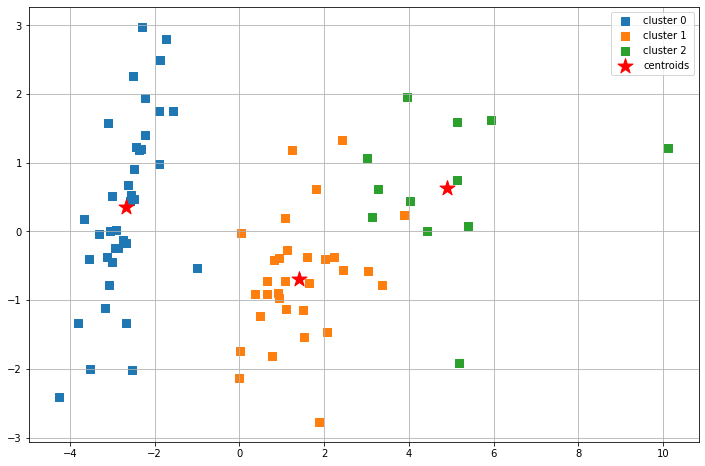

In [591]:
plot_clusters(np.array(df_pca), y_km)

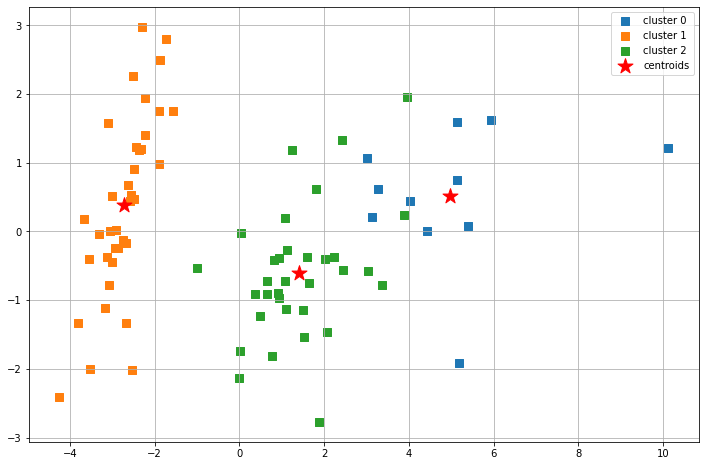

In [592]:
plot_clusters(np.array(X), y_ac)

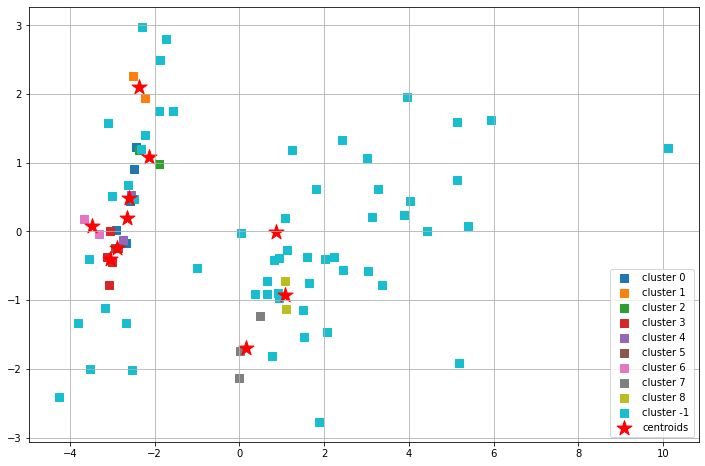

In [593]:
plot_clusters(np.array(X), y_db)

In [594]:
queens['cluster'] = y_km

In [595]:
queens_c0 = queens[queens['cluster']==0].drop('cluster', axis=1)
queens_c1 = queens[queens['cluster']==1].drop('cluster', axis=1)

In [596]:
df_scaled['cluster'] = y_km

In [597]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [598]:
queens_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.0,38.000000
mean,22.342105,579.115886,3.396362,1.505330,86.868421,55.741950,30.789474,0.368421,0.157895,0.242105,0.210526,0.157895,0.001986,4.690118,0.0,0.0,41.315789
std,7.673317,145.451677,0.535120,0.210443,411.853829,35.262017,13.497063,1.807209,0.822860,1.045100,0.703578,0.593948,0.012243,16.625157,0.0,0.0,25.379397
min,3.000000,171.708333,2.411765,1.000000,0.000000,2.411765,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,24.000000,494.260000,2.983333,1.393478,0.000000,27.039216,28.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,20.250000
50%,25.000000,614.460000,3.303431,1.492857,0.000000,55.676471,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,42.500000
75%,25.000000,670.630000,3.720392,1.660000,0.000000,87.823529,40.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.750000
max,41.000000,905.700000,4.425882,1.956522,2397.000000,123.058824,52.000000,11.000000,5.000000,5.000000,3.000000,3.000000,0.075472,86.000000,0.0,0.0,80.000000


In [599]:
queens_clustered = queens

In [600]:
queens_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,25,614.680000,4.425882,1.782609,0,110.647059,41,0.0,0.0,0.000000,0.0,0.0,0.000000,31.000000,0.0,0.0,1,0
1,25,470.320000,3.735686,1.521739,0,93.392157,35,0.0,0.0,0.000000,0.0,3.0,0.000000,0.000000,0.0,0.0,80,0
2,67,616.132372,4.055809,1.833333,34779,271.739216,121,17.0,20.0,4.466667,11.0,18.0,0.108108,7.831683,1.0,1.0,37,2
3,25,556.520000,4.030588,1.560000,0,100.764706,39,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,22,0
4,54,474.089308,3.731336,1.679245,27534,201.492157,89,17.0,4.0,4.166667,24.0,2.0,0.048780,23.641026,0.0,0.0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,47,611.313061,3.810521,1.465116,9186,156.231372,63,20.0,6.0,4.550000,18.0,3.0,0.101695,15.726415,0.0,0.0,50,1
77,71,721.961640,3.859049,1.636364,9295,235.401961,90,38.0,11.0,4.412500,44.0,5.0,0.079545,19.670732,0.0,0.0,48,1
78,58,631.065083,3.894377,1.408163,9496,206.401961,69,11.0,17.0,4.093333,18.0,2.0,0.153846,40.545455,0.0,0.0,31,1
79,48,530.510716,3.615948,1.153846,5916,162.717647,30,32.0,18.0,4.253846,30.0,10.0,0.098592,22.285714,0.0,0.0,6,1


In [601]:
queens.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,25,614.680000,4.425882,1.782609,0,110.647059,41,0.0,0.0,0.000000,0.0,0.0,0.000000,31.000000,0.0,0.0,1
1,54,474.089308,3.731336,1.679245,27534,201.492157,89,17.0,4.0,4.166667,24.0,2.0,0.048780,23.641026,0.0,0.0,35
2,67,616.132372,4.055809,1.833333,34779,271.739216,121,17.0,20.0,4.466667,11.0,18.0,0.108108,7.831683,1.0,1.0,37


# Manhattan

In [603]:
# Loading data
man = pd.read_csv('clean_data/manhattan.csv')
man.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Manhattan,Marble Hill,40.876551,-73.910660,10034,25,0,17,25,639.960000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Manhattan,Chinatown,40.715618,-73.994279,10002,25,0,25,22,381.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan,Washington Heights,40.851903,-73.936900,10032,33,8,33,28,576.879513,...,16.113139,2016.346614,6.980080,15.980080,12.290837,18.0,18.0,7.444444,16.555556,1.0
3,Manhattan,Inwood,40.867684,-73.921210,10034,62,43,60,59,567.827898,...,16.239631,2017.633508,7.219895,15.926702,13.413613,3.0,3.0,7.000000,22.000000,1.0
4,Manhattan,Hamilton Heights,40.823604,-73.949688,10039,30,5,30,29,596.365655,...,14.513043,2018.057143,6.933333,14.771429,12.352381,4.0,4.0,7.250000,15.500000,1.0


In [604]:
man.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [605]:
man.fillna(0, inplace=True)

In [606]:
man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 40 non-null     object 
 1   Restaurant_Count_Name         40 non-null     int64  
 2   Restaurant_Mean_Distance (m)  40 non-null     float64
 3   Restaurant_Mean_Rating        40 non-null     float64
 4   Restaurant_Mean_Price         40 non-null     float64
 5   Restaurant_Sum_Reviews        40 non-null     int64  
 6   Restaurant_Sum_Rating         40 non-null     float64
 7   Restaurant_Sum_Price          40 non-null     int64  
 8   School_Count_Name             40 non-null     float64
 9   Park_Count_Name               40 non-null     float64
 10  Park_Mean_Rating              40 non-null     float64
 11  Transit_Count_Name            40 non-null     float64
 12  Grocery_Count_Name            40 non-null     float64
 13  Rat_Mea

In [607]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [608]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(man['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
man['NeighbourhoodLabel'] = Neighbourhood_labels

In [609]:
man.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [610]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [611]:
df_norm = pd.DataFrame(n_scaler.fit_transform(man),columns=man.columns)

In [612]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(man), columns=man.columns)

In [613]:
df_robust = pd.DataFrame(r_scaler.fit_transform(man), columns=man.columns)

## Elbow Rule

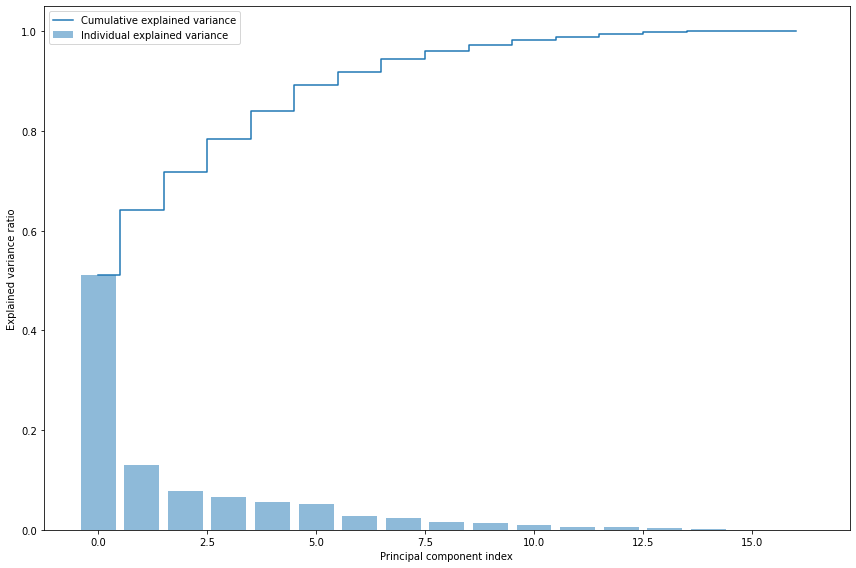

In [614]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [615]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [616]:
df_pca = apply_pca(df_scaled, 5)

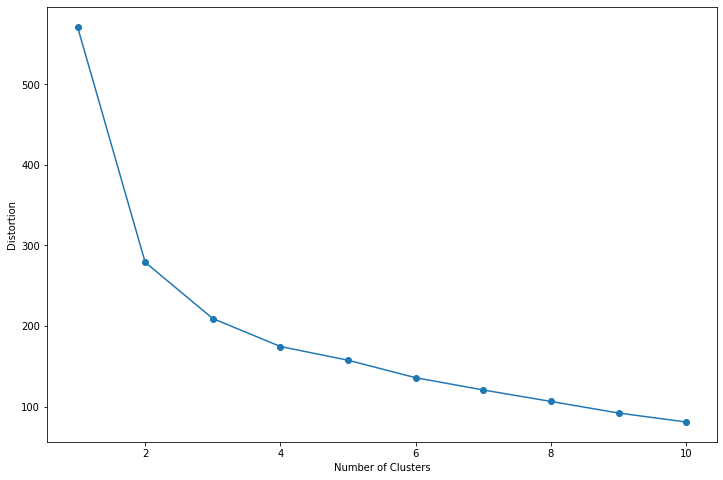

In [617]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

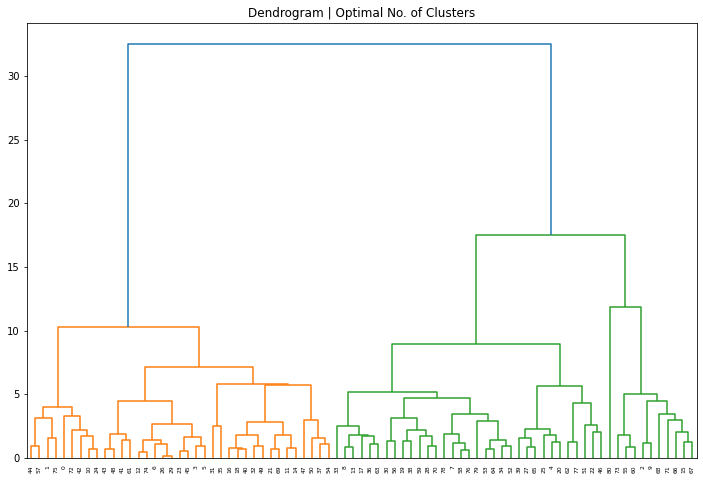

In [618]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [619]:
# 3 and 3 clusters

In [620]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [621]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

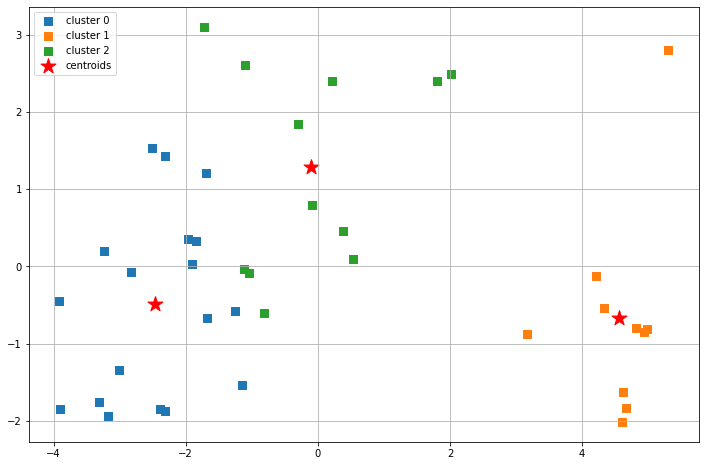

In [622]:
plot_clusters(np.array(df_pca), y_km)

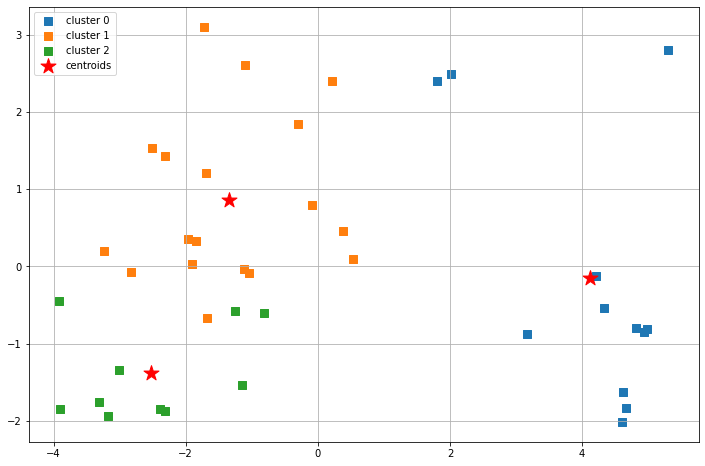

In [623]:
plot_clusters(np.array(X), y_ac)

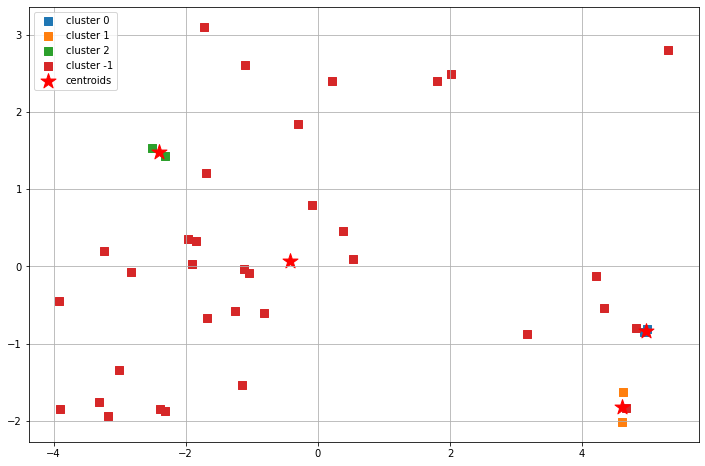

In [624]:
plot_clusters(np.array(X), y_db)

In [625]:
man['cluster'] = y_km

In [626]:
man_c0 = man[man['cluster']==0].drop('cluster', axis=1)
man_c1 = man[man['cluster']==1].drop('cluster', axis=1)

In [627]:
df_scaled['cluster'] = y_km

In [628]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [629]:
man_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,61.388889,768.998263,4.217218,2.069752,49632.722222,257.874728,121.166667,16.277778,16.833333,4.396401,20.222222,8.444444,0.088593,10.585418,601.777778,0.944444,23.444444
std,11.692828,457.574637,0.081743,0.230703,24188.798764,43.837192,21.244376,7.110932,6.758437,0.196756,9.932452,3.899053,0.022527,1.498020,365.554946,0.235702,10.483725
min,47.000000,336.174580,3.984128,1.709677,22473.000000,203.349020,102.000000,4.000000,6.000000,4.046154,6.000000,2.000000,0.045822,8.294118,0.000000,0.000000,5.000000
25%,54.000000,461.063901,4.193504,1.869723,30915.250000,227.404412,105.250000,13.250000,12.250000,4.226827,13.250000,6.000000,0.070367,9.900305,361.750000,1.000000,15.250000
50%,62.000000,609.608442,4.243353,2.075472,45581.000000,256.893137,110.000000,14.500000,17.000000,4.445789,17.500000,8.000000,0.099712,10.531508,640.000000,1.000000,25.500000
75%,63.750000,903.736171,4.268510,2.235397,63147.500000,265.156863,140.250000,20.750000,20.750000,4.568676,26.250000,11.500000,0.105053,11.652072,960.250000,1.000000,32.250000
max,97.000000,1964.460545,4.326575,2.446809,106864.000000,378.492157,164.000000,28.000000,31.000000,4.626316,41.000000,15.000000,0.119403,13.447368,1068.000000,1.000000,38.000000


In [630]:
man_clustered = man

In [631]:
man_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,25,639.960000,3.343714,1.280000,0,56.843137,32,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,22,1
1,25,381.080000,4.432157,1.772727,0,110.803922,39,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,4,1
2,33,576.879513,3.757279,1.607143,383,123.990196,45,4.0,5.0,4.425000,0.0,1.0,0.087591,12.290837,18.0,1.0,37,2
3,62,567.827898,3.748039,1.610169,22149,224.882353,95,18.0,17.0,4.607692,16.0,12.0,0.119816,13.413613,3.0,1.0,15,2
4,30,596.365655,3.767059,1.655172,1960,113.011765,48,2.0,1.0,4.300000,0.0,3.0,0.086957,12.352381,4.0,1.0,13,2
5,49,518.471453,3.889476,1.844444,12651,190.584314,83,10.0,18.0,4.131250,18.0,8.0,0.084951,8.210526,8.0,1.0,21,2
6,40,545.428211,3.900588,1.710526,17646,156.023529,65,14.0,16.0,4.406667,10.0,10.0,0.063932,9.698331,33.0,1.0,2,2
7,45,618.768004,4.018649,1.627907,16336,180.839216,70,19.0,34.0,4.265625,14.0,12.0,0.092715,9.910584,97.0,1.0,7,2
8,53,453.160000,4.240474,2.075472,24647,224.745098,110,28.0,31.0,4.540909,38.0,10.0,0.100251,10.438017,673.0,1.0,35,0
9,25,434.520000,4.290980,1.760000,0,107.274510,44,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,39,1


In [632]:
man.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,53,453.160000,4.240474,2.075472,24647,224.745098,110,28.0,31.0,4.540909,38.0,10.0,0.100251,10.438017,673.0,1.0,35
1,25,639.960000,3.343714,1.280000,0,56.843137,32,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,22
2,33,576.879513,3.757279,1.607143,383,123.990196,45,4.0,5.0,4.425000,0.0,1.0,0.087591,12.290837,18.0,1.0,37


# Brooklyn

In [633]:
# Loading data
brooklyn = pd.read_csv('clean_data/brooklyn.csv')
brooklyn.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Brooklyn,Bay Ridge,40.625801,-74.030621,11209,25,0,25,25,562.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,Bensonhurst,40.611009,-73.995180,11214,25,0,17,22,654.720000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,Sunset Park,40.645103,-74.010316,11220,47,30,46,46,584.041121,...,14.768456,2018.777778,6.992337,15.490421,15.628352,12.0,12.0,7.833333,15.666667,1.0
3,Brooklyn,Greenpoint,40.730201,-73.954241,11222,59,40,59,58,359.651803,...,16.088050,2016.919298,6.785965,16.364912,14.915789,156.0,156.0,6.923077,15.878205,1.0
4,Brooklyn,Gravesend,40.595260,-73.973471,11223,88,70,75,71,597.882431,...,15.870370,2016.827957,6.559140,17.000000,10.838710,NaN,NaN,NaN,NaN,NaN


In [634]:
brooklyn.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [635]:
brooklyn.fillna(0, inplace=True)

In [636]:
brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 70 non-null     object 
 1   Restaurant_Count_Name         70 non-null     int64  
 2   Restaurant_Mean_Distance (m)  70 non-null     float64
 3   Restaurant_Mean_Rating        70 non-null     float64
 4   Restaurant_Mean_Price         70 non-null     float64
 5   Restaurant_Sum_Reviews        70 non-null     int64  
 6   Restaurant_Sum_Rating         70 non-null     float64
 7   Restaurant_Sum_Price          70 non-null     int64  
 8   School_Count_Name             70 non-null     float64
 9   Park_Count_Name               70 non-null     float64
 10  Park_Mean_Rating              70 non-null     float64
 11  Transit_Count_Name            70 non-null     float64
 12  Grocery_Count_Name            70 non-null     float64
 13  Rat_Mea

In [637]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [638]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(brooklyn['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
brooklyn['NeighbourhoodLabel'] = Neighbourhood_labels

In [639]:
brooklyn.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [640]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [641]:
df_norm = pd.DataFrame(n_scaler.fit_transform(brooklyn),columns=brooklyn.columns)

In [642]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(brooklyn), columns=brooklyn.columns)

In [643]:
df_robust = pd.DataFrame(r_scaler.fit_transform(brooklyn), columns=brooklyn.columns)

## Elbow Rule

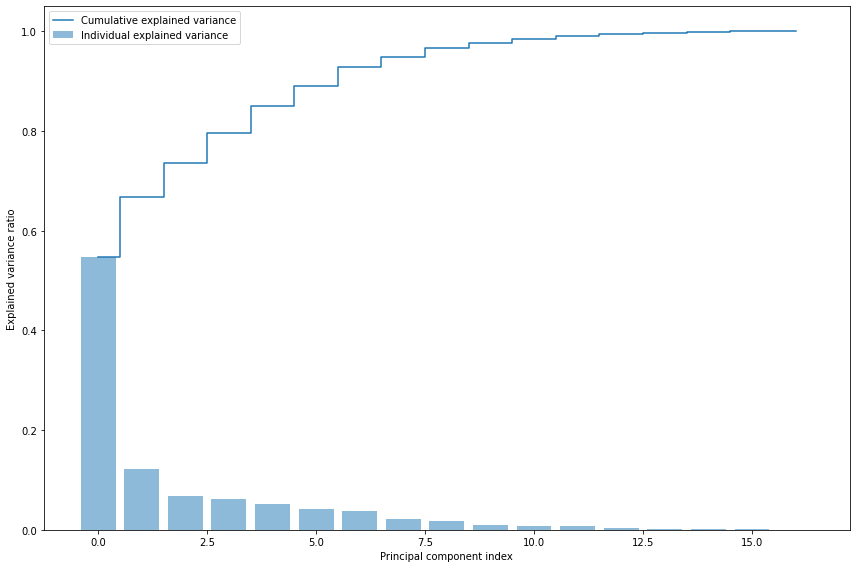

In [644]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [645]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [646]:
df_pca = apply_pca(df_scaled, 5)

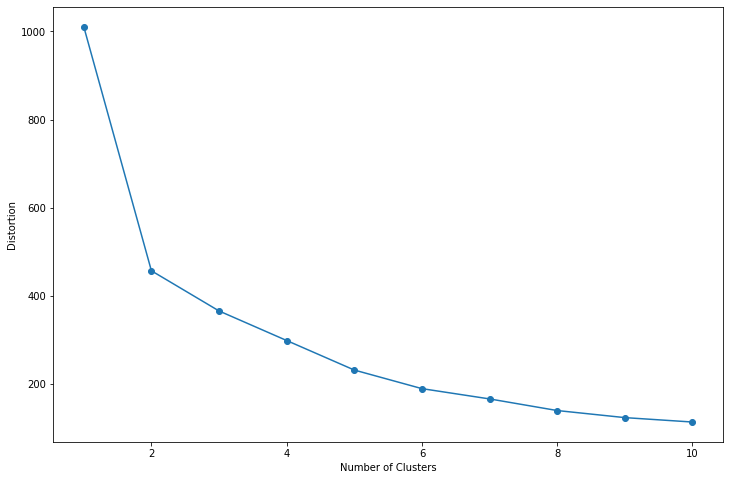

In [647]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

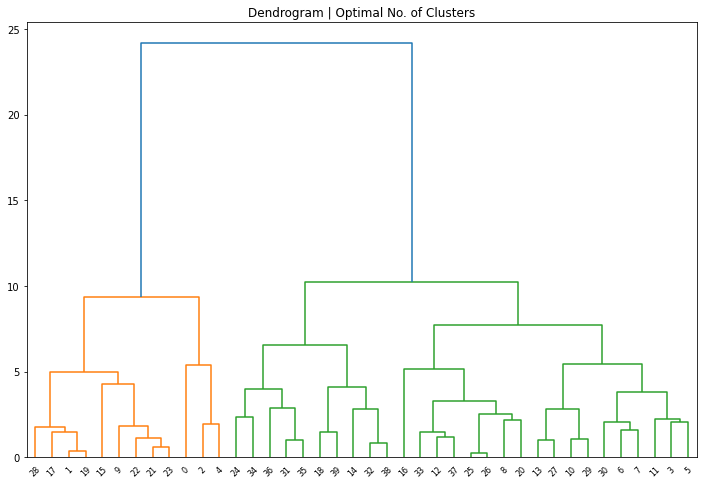

In [648]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [649]:
# 3 and 3 clusters

In [650]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [651]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

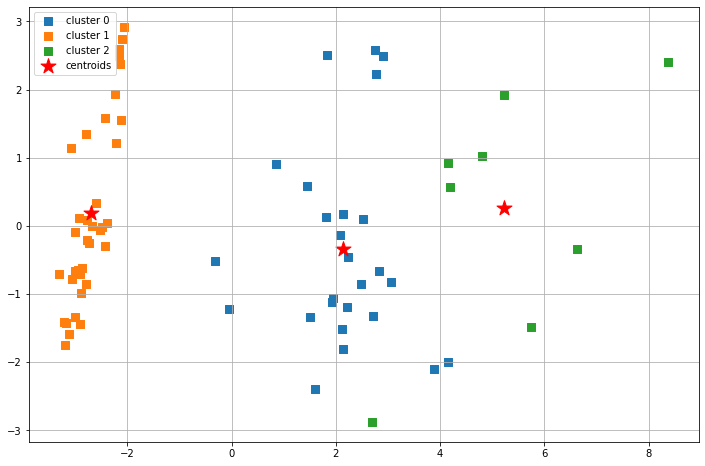

In [652]:
plot_clusters(np.array(df_pca), y_km)

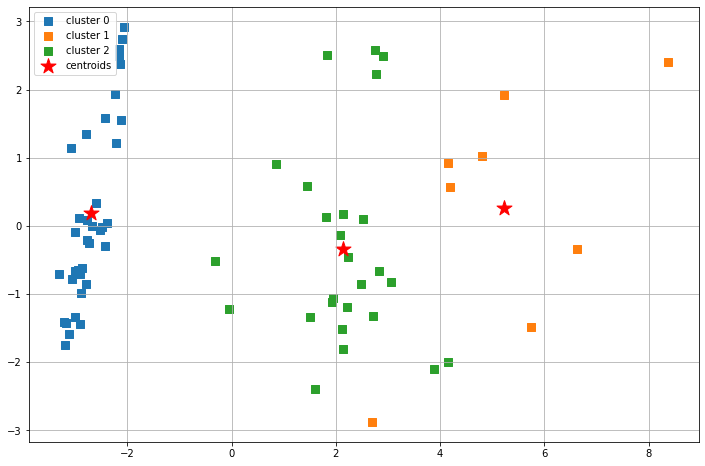

In [653]:
plot_clusters(np.array(X), y_ac)

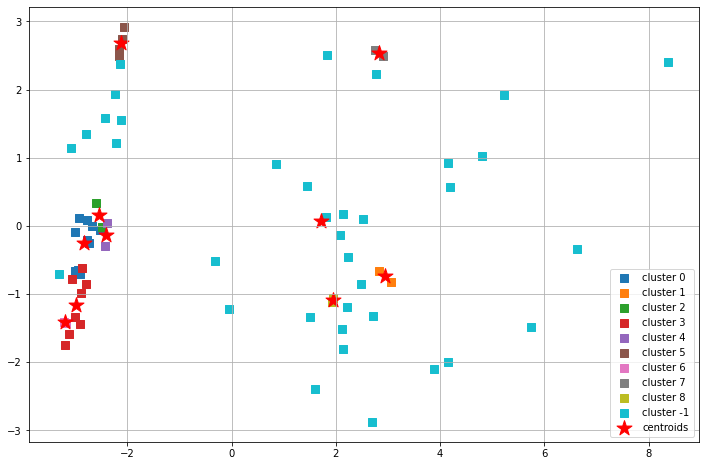

In [654]:
plot_clusters(np.array(X), y_db)

In [655]:
brooklyn['cluster'] = y_km

In [656]:
brooklyn_c0 = brooklyn[brooklyn['cluster']==0].drop('cluster', axis=1)
brooklyn_c1 = brooklyn[brooklyn['cluster']==1].drop('cluster', axis=1)

In [657]:
df_scaled['cluster'] = y_km

In [658]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [659]:
brooklyn_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,63.038462,618.645413,3.906276,1.603643,15855.769231,222.166139,87.076923,23.846154,15.923077,4.312820,22.230769,13.615385,0.099552,12.804008,30.884615,0.730769,32.461538
std,16.715216,127.173757,0.272955,0.199478,7610.959978,54.254400,21.547943,9.829313,8.903586,0.223635,11.863584,6.419202,0.041176,1.730582,53.118981,0.452344,21.850823
min,29.000000,359.651803,3.447304,1.224490,1128.000000,106.092157,50.000000,7.000000,3.000000,3.650000,1.000000,3.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,47.250000,546.916974,3.675263,1.511538,12151.500000,188.099020,68.000000,16.000000,9.250000,4.228125,15.250000,8.250000,0.072518,11.537943,0.250000,0.250000,14.250000
50%,64.000000,627.942912,3.866880,1.582850,15847.500000,219.704902,89.000000,25.000000,14.000000,4.328333,20.500000,13.000000,0.094692,12.373050,5.000000,1.000000,29.000000
75%,75.250000,704.163305,4.186273,1.761065,18569.000000,266.361765,103.250000,29.750000,19.000000,4.458636,29.500000,18.000000,0.130650,14.138830,24.500000,1.000000,51.750000
max,95.000000,909.412879,4.343436,2.000000,30472.000000,297.139216,122.000000,46.000000,42.000000,4.621429,49.000000,25.000000,0.164706,16.319444,156.000000,1.000000,69.000000


In [660]:
brooklyn_clustered = brooklyn

In [661]:
brooklyn_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,25,562.640000,3.760784,1.920000,0,94.019608,48,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1,1
1,25,654.720000,3.186851,1.363636,0,54.176471,30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3,1
2,47,584.041121,3.865175,1.369565,12112,177.798039,63,20.0,3.0,4.300000,17.0,19.0,0.124161,15.628352,12.0,1.0,64,0
3,59,359.651803,4.343436,1.810345,17627,256.262745,105,19.0,19.0,4.621429,15.0,9.0,0.100629,14.915789,156.0,1.0,37,0
4,88,597.882431,3.961856,1.577465,30472,297.139216,112,30.0,14.0,4.436364,23.0,12.0,0.138889,10.838710,0.0,0.0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,122,631.362280,4.086647,1.939130,74115,494.484314,223,47.0,47.0,4.457143,62.0,13.0,0.076923,16.572052,355.0,1.0,22,2
66,25,394.440000,2.782135,1.590909,0,50.078431,35,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,39,1
67,95,701.682552,3.631943,1.380282,20237,286.923529,98,37.0,42.0,4.080000,39.0,18.0,0.124074,11.793684,1.0,1.0,38,0
68,89,704.990223,3.793099,1.512821,18620,292.068627,118,33.0,9.0,3.800000,24.0,17.0,0.056338,11.514706,0.0,0.0,41,0


In [662]:
brooklyn.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,47,584.041121,3.865175,1.369565,12112,177.798039,63,20.0,3.0,4.300000,17.0,19.0,0.124161,15.628352,12.0,1.0,64
1,25,562.640000,3.760784,1.920000,0,94.019608,48,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1
2,78,488.627746,4.161664,1.768116,26719,324.609804,122,24.0,31.0,4.496296,37.0,8.0,0.139241,11.791045,117.0,1.0,57
